In [12]:
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes
import util

#importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'datasets/everything.csv', sep=',', index_col=None, header=0)

display(df_dataset.head(n=6))

,TWEET,CLASS
0,@tweetmee lol atleast i have csgo and archeage...,1
1,@ryuuboruzdota @draskyl @archeage go back to w...,-1
2,@toffees_dota2 @ryuuboruzdota @draskyl @archea...,-1
3,like sooooooooooo excited to play archeage. my...,1
4,@emeldavi_dota @toffees_dota2 @ryuuboruzdota @...,-1
5,had a amazing night with u guys thx to all my ...,1


In [16]:
#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset['TWEET'].values

#pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset['CLASS'].values.astype(int)
Y = np.where(Y != -1, Y, 0)
Y = np.where(Y != 1, Y, 1)

display(Y)

array([1, 0, 0, ..., 1, 0, 1])

In [17]:
#limpa e tokeniza os tweets
cleaned_tweets = util.tweets_cleaner(X)
#constrói o vocabulário
vocab = util.build_vocab(cleaned_tweets)
#constrói o vetor de features para cada tweet
Xfeatures = np.array(util.build_representation(cleaned_tweets, vocab))
print(Xfeatures.shape)
print(Y.shape)

(2772, 3191)
(2772,)


In [18]:
pVitoria = sum(Y==1)/len(Y) 
pDerrota = sum(Y==0)/len(Y)

def calcularProbabilidades(X, Y):
    """
    CALCULARPROBABILIDADES Computa a probabilidade de ocorrencia de cada 
    atributo por rotulo possivel. A funcao retorna dois vetores de tamanho n
    (qtde de atributos), um para cada classe.
    
    CALCULARPROBABILIDADES(X, Y) calcula a probabilidade de ocorrencia de cada atributo em cada classe. 
    Cada vetor de saida tem dimensao (n x 1), sendo n a quantidade de atributos por amostra.
    """
    
    #  inicializa os vetores de probabilidades
    pAtrVitoria = np.zeros(X.shape[1])
    pAtrDerrota = np.zeros(X.shape[1])

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: Complete o codigo para encontrar a probabilidade de
    #                ocorrencia de um atributo para uma determinada classe.
    #                Ex.: para a classe 1 (vitoria), devera ser computada um
    #                vetor pAtrVitoria (n x 1) contendo n valores:
    #                P(Atributo1=1|Classe=1), ..., P(Atributo5=1|Classe=1), e o
    #                mesmo para a classe 0 (derrota):
    #                P(Atributo1=1|Classe=0), ..., P(Atributo5=1|Classe=0).
    # 


    pAtrVitoria = np.matmul(Y, X)/sum(Y==1)
    pAtrDerrota = np.matmul(1 - Y, X)/sum(Y==0)
    ##########################################################################

    return pAtrVitoria, pAtrDerrota

pAtrVitoria, pAtrDerrota = calcularProbabilidades(Xfeatures,Y)

In [19]:
def classificacao(X,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota):
    """
    Classifica se a entrada x pertence a classe 0 ou 1 usando
    as probabilidades extraidas da base de treinamento. Essa funcao 
    estima a predicao de x atraves da maior probabilidade da amostra  
    pertencer a classe 1 ou 0. Tambem retorna as probabilidades condicionais
    de vitoria e derrota, respectivamente.
    
    """

    #  inicializa a classe e as probabilidades condicionais
    classe = [];
    probVitoria= 0;
    probDerrota = 0;

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    #  Instrucoes: Complete o codigo para estimar a classificacao da amostra
    #                usando as probabilidades extraidas da base de treinamento.
    #                Voce precisara encontrar as probabilidades Bayesianas 
    #                probVitoria p(classe=1|x) e probDerrota p(classe=0|x) e
    #                selecionar a maior.
    # 

    for x in X:
        probVitoria = pVitoria * np.prod(pAtrVitoria * x + (1 - pAtrVitoria) * (1 - x))
        probDerrota = pDerrota * np.prod(pAtrDerrota * x + (1 - pAtrDerrota) * (1 - x))
        if probVitoria < probDerrota:
            classe.append(0)
        else:
            classe.append(1)
    
    
    classe = np.array(classe)
    
    
    
    
    
    
    

    ########################################################################## 

    return classe, probVitoria, probDerrota 

resultados = np.zeros( Xfeatures.shape[0] )
resultados, probVitoria, probDerrota = classificacao( Xfeatures,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )

# calcular acuracia
acuracia = np.sum(resultados==Y)/len(Y)

print(acuracia)

0.9527417027417028


Numero de dados de validação: 444


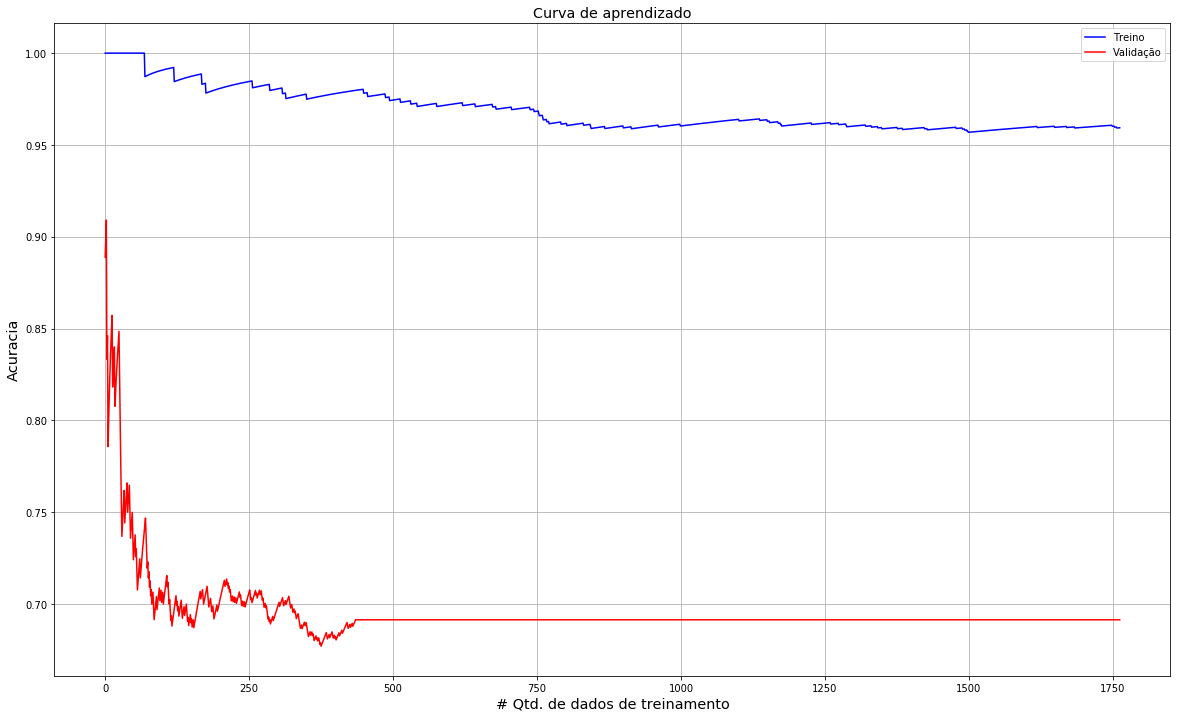

In [20]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = util.stratified_holdOut(Yk, pTrain)

X_train, X_test = Xk[train_index, :], Xk[test_index, :];
Y_train, Y_test = Yk[train_index], Yk[test_index];

train_index, val_index = util.stratified_holdOut(Y_train, pTrain)

X_train_v, X_val = X_train[train_index, :], X_train[val_index, :]
Y_train_v, Y_val = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(X_val.shape[0]))

def curva_aprendizado(X, Y, Xval, Yval):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    
    pVitoria = sum(Y==1)/len(Y) 
    pDerrota = sum(Y==0)/len(Y)
    
    for i in np.arange(9, len(X) - 1):
        pAtrVitoria, pAtrDerrota = calcularProbabilidades(X,Y)
        p, probVitoria, probDerrota = classificacao(X[:i],pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
        cm = util.get_confusionMatrix(Y[:i], p, [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_train.append(results['acuracia'])
        # Validação
        p, probVitoria, probDerrota = classificacao(Xval[:i],pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
        cm = util.get_confusionMatrix(Yval[:i], p, [0,1])
        results = util.relatorioDesempenho(cm, [0,1])
        perf_val.append(results['acuracia'])
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado(X_train_v, Y_train_v, X_val, Y_val)

In [21]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

nFolds = 5
classes = [0,1]
folds = util.stratified_kfolds(Yk, nFolds, classes) 

k=1
resultados=[]
for train_index, test_index in folds:
    print('\n-----------\n%d-fold: \n-----------\n' % (k) )

    # se train_index ou test_index forem vazios, interrompe o laco de repeticao
    if len(train_index)==0 or len(test_index)==0: 
        print('\tErro: o vetor com os indices de treinamento ou o vetor com os indices de teste esta vazio')      
        break
        
    totalFold = len(train_index)+len(test_index)

    X_train, X_test = Xk[train_index, :], Xk[test_index, :];
    Y_train, Y_test = Yk[train_index], Yk[test_index];
    
    # separa os dados de treinamento em treinamento e validacao
    pTrain = 0.8
    train_index_v, val_index = util.stratified_holdOut(Y_train, pTrain)

    # chama a função que faz a busca em grade
    #bestRegularization = gridSearch(Xpol_train_v, Y_train_v, Xpol_val, Y_val)

    # executa o treinamento com o melhor parâmetro de regularização encontrado
    pAtrVitoria, pAtrDerrota = calcularProbabilidades(X_train,Y_train)

    # classifica os dados de teste
    Y_pred, probVitoria, probDerrota = classificacao( X_test,pVitoria,pDerrota,pAtrVitoria,pAtrDerrota )
    #Y_pred = predicao(Xpol_test, theta)

    # Compute confusion matrix
    cm = util.get_confusionMatrix(Y_test, Y_pred, classes)

    # Gera o relatório de desempenho
    #print('\n\n\n\t'+"="*50+'\n\tMelhor parametro de regularizacao: %1.6f' %bestRegularization)
    print('\n\tResultado no fold atual usando o melhor parametro encontrado:')
    auxResults = util.relatorioDesempenho(cm, classes, imprimeRelatorio=True)

    # adiciona os resultados do fold atual na lista de resultados
    resultados.append( auxResults ) 
        
    k+=1


-----------
1-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.402       0.835      0.542      0
	0.927       0.629      0.750      1
	------------------------------------------------
	0.664       0.732      0.697      Média macro
	0.676       0.676      0.676      Média micro

	Acuracia: 0.676

-----------
2-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.500       0.874      0.636      0
	0.934       0.672      0.781      1
	------------------------------------------------
	0.717       0.773      0.744      Média macro
	0.727       0.727      0.727      Média micro

	Acuracia: 0.727

-----------
3-fold: 
-----------


	Resultado no fold atual usando o melhor parametro encontrado:

	Revocacao   Precisao   F-medida   Classe
	0.390       0.873      0.539      0
	0.948       0.630      0.757      1
	---------------------------

In [22]:
print('\nResultado final da classificação:')
util.mediaFolds( resultados, classes )


Resultado final da classificação:

	Revocacao   Precisao   F-medida   Classe
	0.444       0.851      0.582      0
	0.929       0.647      0.762      1
	---------------------------------------------------------------------
	0.686       0.749      0.716      Média macro
	0.697       0.697      0.697      Média micro

	Acuracia: 0.697
